<a href="https://colab.research.google.com/github/Armin-Abdollahi/Multilayer-Perceptron-Neural-Network/blob/main/MLP_on_CIFAR10_dataset_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multilayer Perceptron on CIFAR-10 Using PyTorch

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np

In [12]:
transform = transforms.ToTensor()

In [13]:
data_path = '../data_cifar/'
cifar10_train = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_test = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:02<00:00, 70496842.05it/s] 


Extracting ../data_cifar/cifar-10-python.tar.gz to ../data_cifar/
Files already downloaded and verified


In [14]:
print("Training: ", len(cifar10_train))
print("Testing: ", len(cifar10_test))

Training:  50000
Testing:  10000


In [15]:
type(cifar10_train)

torchvision.datasets.cifar.CIFAR10

In [16]:
type(cifar10_test)

torchvision.datasets.cifar.CIFAR10

In [17]:
type(cifar10_train[0])

tuple

In [18]:
image, label = cifar10_train[0]
type(image)

torch.Tensor

In [19]:
image.shape

torch.Size([3, 32, 32])

In [20]:
classes = cifar10_train.classes
print (classes)
print(label)
print(classes[label])

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
6
frog


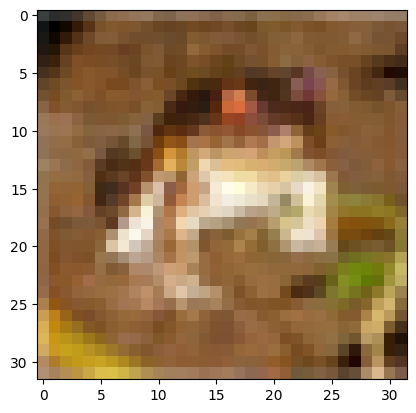

In [21]:
plt.imshow(image.permute(1, 2, 0))

In [22]:
torch.manual_seed(80)
train_loader = DataLoader(cifar10_train, batch_size=100, shuffle=True)
test_loader = DataLoader(cifar10_test, batch_size=500, shuffle=False)

In [23]:
class MultilayerPerceptron(nn.Module):

    def __init__(self, input_size=32*32*3, output_size=10):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, output_size)
        #self.dropout = nn.Dropout(p=0.5)

    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=1)

In [24]:
torch.manual_seed(80)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
for param in model.parameters():
  print(param.numel())

368640
120
10080
84
840
10


In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [27]:
for images, labels in train_loader:
  break

In [28]:
images.shape

torch.Size([100, 3, 32, 32])

In [29]:
images.view(-1, 3072).shape

torch.Size([100, 3072])

In [30]:
import time
start_time = time.time()

In [31]:
epochs = 10

train_losses = []
test_losses = []
train_correct = []
test_correct  = []

In [33]:
for b_iter, (X_train, y_train) in enumerate(train_loader):
      b_iter +=1

      y_pred = model(X_train.view(100, -1))
      loss = criterion(y_pred, y_train)

      predicted = torch.max(y_pred.data, 1)[1]
      batch_corr = (predicted == y_train).sum()
      trn_corr += batch_corr


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

NameError: ignored

In [34]:
if b_iter % 100 == 0:

        accuracy = trn_corr.item()*100 / (100*b_iter)
        print( f'epoch: {i} batch {b_iter} loss:{loss.item()} accuracy:{accuracy} ')

In [35]:
train_losses.append(loss)
train_correct.append(trn_corr)

NameError: ignored

In [41]:
with torch.no_grad():

      for b_iter, (X_test, y_test) in enumerate(test_loader):

        y_val = model(X_test.view(500, -1))

        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

IndentationError: ignored

In [39]:
total_time = time.time() - start_time
print( f' Duration: {total_time/60} mins')

 Duration: 8.150755898157756 mins


In [42]:
import time
start_time = time.time()

epochs = 10

train_losses = []
test_losses = []
train_correct = []
test_correct  = []

for i in range(epochs):

    trn_corr = 0
    tst_corr = 0
    batch_corr = 0


    for b_iter, (X_train, y_train) in enumerate(train_loader):
      b_iter +=1

      y_pred = model(X_train.view(100, -1))
      loss = criterion(y_pred, y_train)

      predicted = torch.max(y_pred.data, 1)[1]
      batch_corr = (predicted == y_train).sum()
      trn_corr += batch_corr


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if b_iter % 100 == 0:

        accuracy = trn_corr.item()*100 / (100*b_iter)
        print( f'epoch: {i} batch {b_iter} loss:{loss.item()} accuracy:{accuracy} ')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    with torch.no_grad():

      for b_iter, (X_test, y_test) in enumerate(test_loader):

        y_val = model(X_test.view(500, -1))

        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

total_time = time.time() - start_time
print( f' Duration: {total_time/60} mins')

epoch: 0 batch 100 loss:2.271998405456543 accuracy:14.73 
epoch: 0 batch 200 loss:2.251981496810913 accuracy:15.71 
epoch: 0 batch 300 loss:2.1436662673950195 accuracy:17.1 
epoch: 0 batch 400 loss:2.073559522628784 accuracy:19.04 
epoch: 0 batch 500 loss:2.0167574882507324 accuracy:20.464 
epoch: 1 batch 100 loss:1.9786044359207153 accuracy:29.19 
epoch: 1 batch 200 loss:2.001901626586914 accuracy:29.38 
epoch: 1 batch 300 loss:1.9458880424499512 accuracy:29.58 
epoch: 1 batch 400 loss:1.9326761960983276 accuracy:29.8325 
epoch: 1 batch 500 loss:1.961470365524292 accuracy:30.114 
epoch: 2 batch 100 loss:1.9209376573562622 accuracy:32.43 
epoch: 2 batch 200 loss:1.9273982048034668 accuracy:32.305 
epoch: 2 batch 300 loss:1.7169877290725708 accuracy:32.47 
epoch: 2 batch 400 loss:1.8912736177444458 accuracy:32.5475 
epoch: 2 batch 500 loss:1.8639893531799316 accuracy:32.828 
epoch: 3 batch 100 loss:1.7524703741073608 accuracy:34.53 
epoch: 3 batch 200 loss:1.8540332317352295 accuracy:34

RuntimeError: ignored

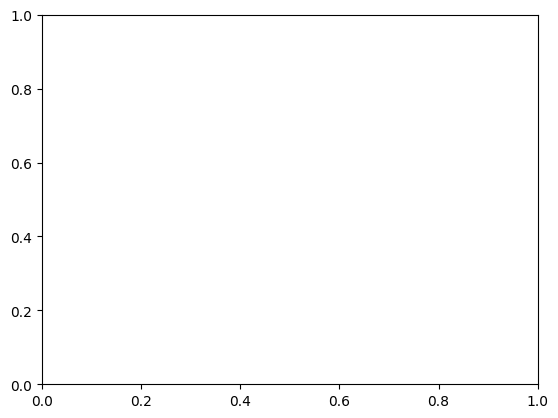

In [43]:
plt.plot(train_losses, label= "Training loss")
plt.plot(test_losses, label= "Test loss")
plt.legend()

In [44]:
train_accuracy =[t/500 for t in train_correct ]
train_accuracy

[tensor(20.4640),
 tensor(30.1140),
 tensor(32.8280),
 tensor(34.8100),
 tensor(36.4760),
 tensor(37.8000),
 tensor(38.8380),
 tensor(39.9940),
 tensor(40.8560),
 tensor(42.0780)]

In [45]:
test_accuracy =[t/100 for t in test_correct ]
test_accuracy

[tensor(27.7200),
 tensor(31.1900),
 tensor(34.3700),
 tensor(35.2600),
 tensor(37.8800),
 tensor(38.4100),
 tensor(39.7200),
 tensor(40.6400),
 tensor(41.7700),
 tensor(42.6100)]

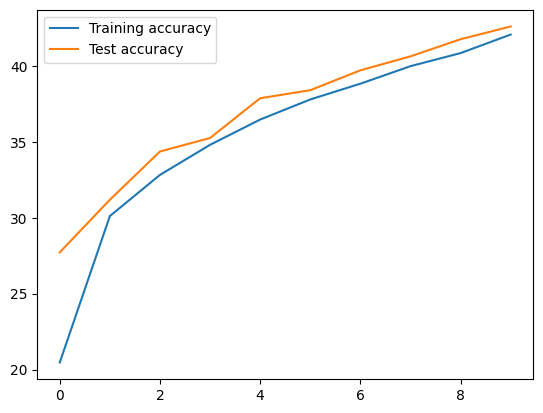

In [46]:
plt.plot(train_accuracy, label= "Training accuracy")
plt.plot(test_accuracy, label= "Test accuracy")
plt.legend()

In [47]:
test_load_all = DataLoader(cifar10_test, batch_size=10000, shuffle=False)

In [48]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_all:
    y_val = model(X_test.view(len(X_test),-1))
    predicted = torch.max(y_val,1)[1]
    correct += (predicted == y_test).sum()

In [49]:
100*correct.item()/len(cifar10_test)

42.61

In [50]:
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[544,  68, 120,  44,  63,  37,   6,  44, 221,  67],
       [ 30, 481,  21,  30,  15,  20,  22,  24,  68, 144],
       [ 71,  11, 231,  90, 123, 105,  59,  56,  19,  12],
       [ 21,  23,  48, 187,  25, 121,  53,  35,  22,  21],
       [ 41,  31, 221, 103, 421, 110, 146, 130,  23,  24],
       [ 12,  24,  72, 198,  42, 331,  64,  46,  40,  19],
       [ 29,  47, 163, 174, 160, 125, 581,  59,  13,  56],
       [ 79,  61,  95, 104, 115, 111,  38, 527,  38,  71],
       [ 94,  35,  12,  13,  16,  18,   8,   7, 411,  39],
       [ 79, 219,  17,  57,  20,  22,  23,  72, 145, 547]])

In [51]:
img = images[0].view(1, 3072)

# we are turning off the gradients
with torch.no_grad():
    model_prediction = model.forward(img)

[0.0848956  0.09661955 0.07106609 0.3100941  0.02341066 0.11086744
 0.11053316 0.03065262 0.01125417 0.15060668]


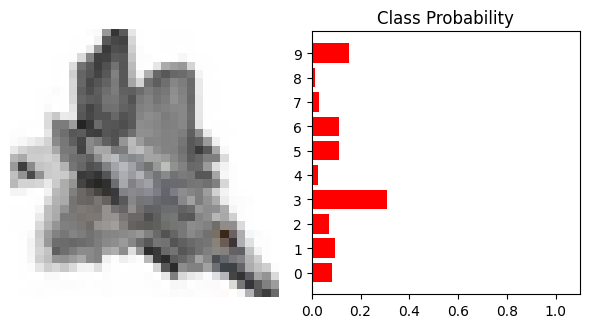

In [52]:
probabilities = F.softmax(model_prediction, dim=1).detach().cpu().numpy().squeeze()

print(probabilities)

fig, (ax1, ax2) = plt.subplots(figsize=(6,8), ncols=2)
img = img.view(3, 32, 32)
ax1.imshow(img.permute(1, 2, 0).detach().cpu().numpy().squeeze(), cmap='inferno')
ax1.axis('off')
ax2.barh(np.arange(10), probabilities, color='r' )
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)

plt.tight_layout()

In [53]:
test_load_all = DataLoader(cifar10_test, batch_size=64, shuffle=False)

In [54]:
images, labels = next(iter(test_load_all))

with torch.no_grad():
  images, labels = images, labels
  preds = model(X_test.view(len(X_test),-1))

images_np = [i.mean(dim=0).cpu().numpy() for i in images]
class_names = cifar10_test.classes

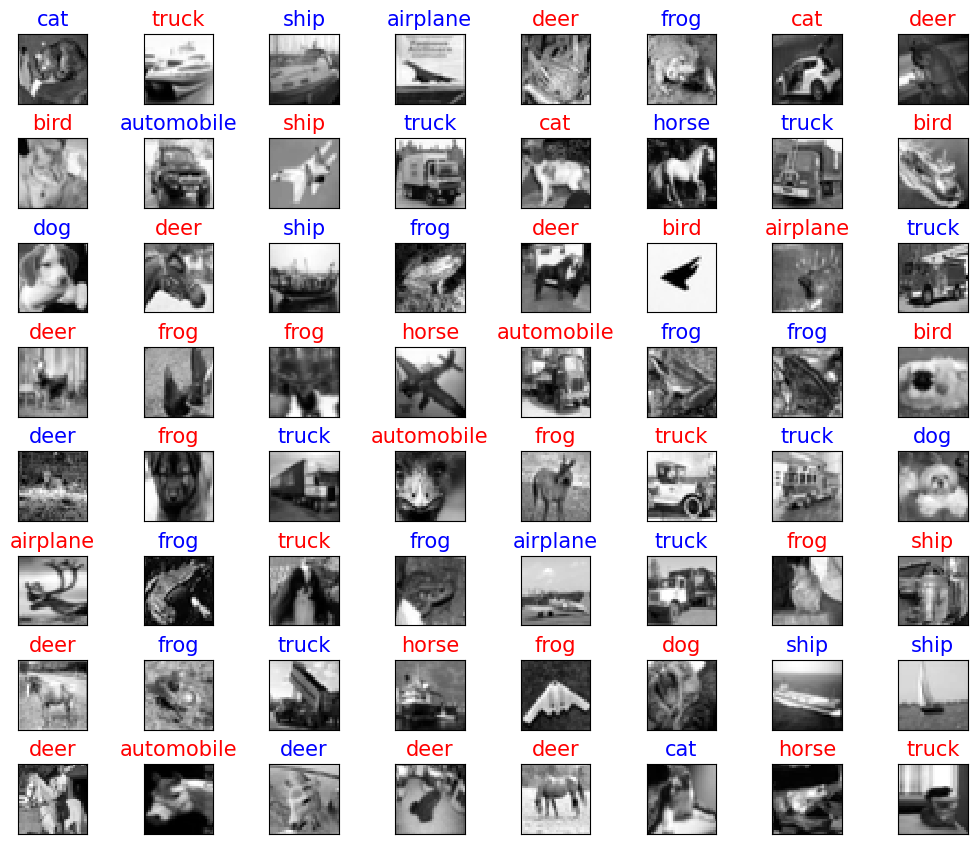

In [55]:
fig = plt.figure(figsize=(10, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(images_np[i], cmap='gray', interpolation='nearest')
    color = "blue" if labels[i] == torch.max(preds[i], 0)[1] else "red"
    plt.title(class_names[torch.max(preds[i], 0)[1]], color=color, fontsize=15)